In [29]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException
import time
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import re
from datetime import datetime
from selenium.webdriver import ActionChains

In [82]:
options=Options()
options.chrome_executable_path="chromedriver.exe"
driver=webdriver.Chrome(options=options)
wait = WebDriverWait(driver, 10)

In [83]:
driver.get('https://www.zara.com/us/en/man-tshirts-l855.html?v1=2432042&regionGroupId=21')
time.sleep(5)
driver.maximize_window()
driver.find_element(By.XPATH,'//*[@id="theme-app"]/div/div/header/div[5]/div[2]/button[3]').click()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=129.0.6668.70)
Stacktrace:
0   chromedriver                        0x00000001032e4274 cxxbridge1$str$ptr + 1907280
1   chromedriver                        0x00000001032dc75c cxxbridge1$str$ptr + 1875768
2   chromedriver                        0x0000000102ef0260 cxxbridge1$string$len + 89488
3   chromedriver                        0x0000000102ecb728 core::str::slice_error_fail::hbaf5d05fe3921cd2 + 3776
4   chromedriver                        0x0000000102f5ae8c cxxbridge1$string$len + 526780
5   chromedriver                        0x0000000102f6e218 cxxbridge1$string$len + 605512
6   chromedriver                        0x0000000102f2912c cxxbridge1$string$len + 322652
7   chromedriver                        0x0000000102f29d7c cxxbridge1$string$len + 325804
8   chromedriver                        0x00000001032ac504 cxxbridge1$str$ptr + 1678560
9   chromedriver                        0x00000001032b0e6c cxxbridge1$str$ptr + 1697352
10  chromedriver                        0x0000000103291618 cxxbridge1$str$ptr + 1568244
11  chromedriver                        0x00000001032b173c cxxbridge1$str$ptr + 1699608
12  chromedriver                        0x0000000103282bbc cxxbridge1$str$ptr + 1508248
13  chromedriver                        0x00000001032cd854 cxxbridge1$str$ptr + 1814576
14  chromedriver                        0x00000001032cd9ac cxxbridge1$str$ptr + 1814920
15  chromedriver                        0x00000001032dc3fc cxxbridge1$str$ptr + 1874904
16  libsystem_pthread.dylib             0x000000018f8c6f94 _pthread_start + 136
17  libsystem_pthread.dylib             0x000000018f8c1d34 thread_start + 8


In [64]:
driver.get('https://www.zara.com/us/en/man-tshirts-l855.html?v1=2432042&regionGroupId=21')
time.sleep(5) 

product_urls = []


last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    #scroll to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    

    time.sleep(5)
    
    # get new page height
    new_height = driver.execute_script("return document.body.scrollHeight")

    if new_height == last_height:
        break  
    last_height = new_height


product_elements = driver.find_elements(By.CSS_SELECTOR, 'li.product-grid-product')

for product in product_elements:

    link_element = product.find_element(By.CSS_SELECTOR, 'a.product-link')
    product_url = link_element.get_attribute('href')  
    product_urls.append(product_url)


for url in product_urls:
    print(url)

driver.quit()


https://www.zara.com/us/en/color-block-cat-shirt-p06224374.html
https://www.zara.com/us/en/text-print-t-shirt-p06224372.html
https://www.zara.com/us/en/combination-print-t-shirt-p06224373.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/basic-heavyweight-t-shirt-p01887450.html
https://www.zara.com/us/en/soft-rib-t-shirt-p01887310.html
https://www.zara.com/us/en/soft-rib-t-shirt-p01887310.html
https://www.zara.com/us/en/soft-rib-t-shirt-p01887310.html
https://www.zara.c

In [68]:
import csv
with open('product_urls.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Product URL'])  # 写入表头
    for url in product_urls:
        writer.writerow([url])  # 写入每个URL

In [72]:
# Initialize WebDriver
driver = webdriver.Chrome()  # Adjust as necessary for your browser

# Read URLs from the CSV file
urls_df = pd.read_csv('product_urls.csv')  # Ensure this file contains a column named 'url'
product_list = []

# Iterate over each URL
for index, row in urls_df.iterrows():
    url = row['Product URL']
    
    try:
        driver.get(url)
        time.sleep(5)  
        
        # Extract product information
        product_name = driver.find_element(By.XPATH, '//*[@id="main"]/article/div/div[1]/div[2]/div/div[1]/div[1]/div/h1').text
        product_description = driver.find_element(By.XPATH, '//*[@id="main"]/article/div/div[1]/div[2]/div/div[1]/div[3]/div/div/div/p').text
        price = driver.find_element(By.XPATH, '//*[@id="main"]/article/div/div[1]/div[2]/div/div[1]/div[2]/div/span/span/span/div/span').text
        
        product_list.append({'product': product_name, 'price': price, 'description': product_description})
    
    except Exception as e:
        print(f'Error processing {url}: {e}')
        continue

# Convert product list to DataFrame and save to CSV
products_df = pd.DataFrame(product_list)
products_df.to_csv('products_info.csv', index=False)

driver.quit()

Error processing https://www.zara.com/us/en/scenic-print-t-shirt-p02888432.html: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="main"]/article/div/div[1]/div[2]/div/div[1]/div[3]/div/div/div/p"}
  (Session info: chrome=129.0.6668.70); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x0000000104c00274 cxxbridge1$str$ptr + 1907280
1   chromedriver                        0x0000000104bf875c cxxbridge1$str$ptr + 1875768
2   chromedriver                        0x000000010480c260 cxxbridge1$string$len + 89488
3   chromedriver                        0x000000010485050c cxxbridge1$string$len + 368700
4   chromedriver                        0x000000010488a7d0 cxxbridge1$string$len + 606976
5   chromedriver                        0x000000010484512c cxxbridge1$string$len + 322652
6   chromedriver             

In [84]:
product_df = pd.DataFrame(product_list)
product_df['price'] = product_df['price'].str.replace('$', '').astype(float)
mean_price = product_df['price'].mean()
max_price = product_df['price'].max()
min_price = product_df['price'].min()
print(f'max price: {max_price}, mean price: {mean_price}, min price:{min_price}')

max price: 69.9, mean price: 37.884158415841576, min price:15.9


In [78]:
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text) 
    stop_words = set(stopwords.words('english'))  
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

cleaned_descriptions = [clean_text(product) for product in products_df['product'].unique()]


[nltk_data] Downloading package stopwords to /Users/hazel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
# Flatten the list of lists and count word frequency
all_words = [word for product in cleaned_descriptions for word in product]
word_counts = Counter(all_words)

# Display the most common words
print(word_counts.most_common(10))


[('tshirt', 142), ('tank', 29), ('top', 28), ('knit', 24), ('print', 20), ('text', 18), ('washed', 15), ('cotton', 11), ('textured', 11), ('striped', 10)]


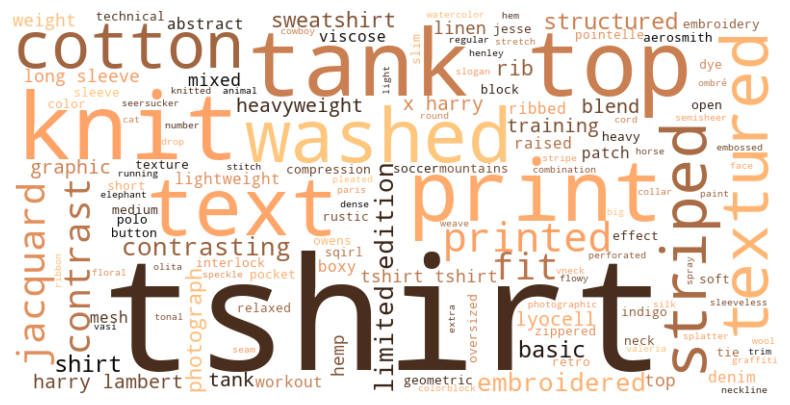

In [87]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='copper').generate(' '.join(all_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
